# Online store data analysis project

### this data from : "https://www.kaggle.com/datasets/ruchi798/shopping-cart-database/data"

## Project stages 
#### 1- Data Understanding 
#### 2- Data Cleaning 
##### ["Drop Duplicates" , "Handling Missing Values " , "Univariate Analysis" , "Handling Outliers" , "Feature Engineering"]
#### 3- Analysis Questions => ["Univariate Analysis" , "Bivariate Analysis"]
#### 4- Dash Board
#### -5 Data Preprocessing


In [1]:
# Loading necessary libraries
import pandas as pd 
import numpy as np 
import plotly.express as px 
import streamlit as st 
import plotly.figure_factory as ff

In [2]:
# Loading all files 
df_customers = pd.read_csv("Shopping Cart Database/customers.csv")
df_orders = pd.read_csv("Shopping Cart Database/orders.csv")
df_products = pd.read_csv("Shopping Cart Database/products.csv")
df_sales = pd.read_csv("Shopping Cart Database/sales.csv")

In [3]:
# Merge all files together 
# First merge between sales table and  orders table on "order_id"
# Second merge between products table and sales table on "product_id"
# Third merge between orders table and customers table on "customer_id"

df = pd.merge(df_sales 
         , df_orders 
         , left_on= "order_id" 
         ,right_on="order_id"
         , how="inner").merge(df_products 
                              , left_on="product_id" 
                              , right_on="product_ID"
                              , how="inner").merge( df_customers 
                                                   , left_on="customer_id" 
                                                   , right_on="customer_id" 
                                                   , how="inner")


In [4]:
# Display first five rows
df.head(5)
#there are many column have to drop


,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,customer_id,payment,order_date,delivery_date,...,quantity_y,description,customer_name,gender,age,home_address,zip_code,city,state,country
0,0,1,218,106,2,212,64,30811,2021-8-30,2021-09-24,...,44,"A orange coloured, L sized, Chambray Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
1,1,1,481,118,1,118,64,30811,2021-8-30,2021-09-24,...,62,"A indigo coloured, S sized, Puffer Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
2,2,1,2,96,3,288,64,30811,2021-8-30,2021-09-24,...,54,"A red coloured, M sized, Oxford Cloth Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
3,3,1,1002,106,2,212,64,30811,2021-8-30,2021-09-24,...,52,"A blue coloured, M sized, Wool Trousers",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
4,4,1,691,113,3,339,64,30811,2021-8-30,2021-09-24,...,53,"A indigo coloured, S sized, Parka Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia


### 1- Data Understanding and handling any error

In [5]:
#  Check data types
df.info()
# order_date column moust be datetime 
# delivery_date column moust be datetime

# i dont have null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sales_id        5000 non-null   int64 
 1   order_id        5000 non-null   int64 
 2   product_id      5000 non-null   int64 
 3   price_per_unit  5000 non-null   int64 
 4   quantity_x      5000 non-null   int64 
 5   total_price     5000 non-null   int64 
 6   customer_id     5000 non-null   int64 
 7   payment         5000 non-null   int64 
 8   order_date      5000 non-null   object
 9   delivery_date   5000 non-null   object
 10  product_ID      5000 non-null   int64 
 11  product_type    5000 non-null   object
 12  product_name    5000 non-null   object
 13  size            5000 non-null   object
 14  colour          5000 non-null   object
 15  price           5000 non-null   int64 
 16  quantity_y      5000 non-null   int64 
 17  description     5000 non-null   object
 18  customer

In [6]:
# Delete unimportant columns 
# all id columns have to drop whitout order_id
df.drop(columns=["sales_id" , "product_id" ,"product_ID" ] , inplace= True)


In [7]:
# there are "quantity_x"  and  "quantity_y"  column 

# quantity_y => means the number of product available
# quantity_x => means the number of What the customer bought

columns_names = df.columns.to_list()
columns_names [13] = "available_in_stock"
columns_names [2] = "quantity"

df.columns = columns_names # Change the columnes names


In [8]:
# 1-
# i have column "price" and "price_per_unit" so i will drop "price" 
# becus if we multiplicat (price*quantity) != total_price

# 2-
# zip_code column i dont need it so i will drob it 

# 3- 
# home_address column i dont need it so i will drob it 

# 4- 
# description i column dont need it so i will drob it 

df.drop(columns=["price" , "zip_code","home_address" , "description"] , inplace= True )


In [9]:
# All sales were made in "Australia" so i will drop country column 

df["country"].unique() # The only value is "Australia"

df.drop(columns="country" , inplace=True) # drop this column 

In [10]:
# Change type "order_date" and "delivery_date" to datetime 
df["order_date"]  =  pd.to_datetime(df["order_date"] , format="%Y/%m/%d")
df["delivery_date"]  =  pd.to_datetime(df["delivery_date"] , format="%Y/%m/%d")

### Understand Each Feature

In [11]:
# order_id =  Customers can buy more than one product in the same order, so the order number is duplicated.
# price_per_unit = Price per product 
# quantity = Number of pieces sold 
# total_price = price_per_unit*quantity = total_price
# payment = Total order price 
# and each column's meaning is clear from its name

####  Check data stats for  Numerical  and Categorical

In [12]:
# Numerical
df.describe()
# the difference between "mean" and "50%" is not pig so i do'not have outlier 
# in age column the "min" is 20 and the "max" is 80 so i do'not sale for children

,order_id,price_per_unit,quantity,total_price,customer_id,payment,available_in_stock,age
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,503.038200,103.501600,1.99240,206.360000,504.563000,33976.785000,60.083400,48.760400
std,285.964418,9.195004,0.80751,86.357457,276.504896,14612.706539,11.682523,17.577519
min,1.000000,90.000000,1.00000,90.000000,1.000000,10043.000000,40.000000,20.000000
25%,258.000000,95.000000,1.00000,112.000000,276.000000,20627.000000,50.000000,34.000000
50%,504.500000,102.000000,2.00000,204.000000,509.000000,34259.000000,60.000000,48.000000
75%,749.000000,112.000000,3.00000,285.000000,733.000000,46608.000000,70.000000,63.000000
max,999.000000,119.000000,3.00000,357.000000,1000.000000,59910.000000,80.000000,80.000000


In [13]:
# Categorical
df.describe(include="object")

,product_type,product_name,size,colour,customer_name,gender,city,state
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,3,35,5,7,616,8,604,8
top,Trousers,Denim,M,blue,Kristofor Roos,Female,Jordanside,South Australia
freq,1683,273,1022,762,37,712,37,718


## 2- Data Cleaning

####  1- Drop Duplicates 

In [14]:
# number of duplicates 
df.duplicated().sum()

1

In [15]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
# reset index after drop
df.reset_index(drop=True , inplace=True)

#### 2- Handling Missing Values


In [16]:
df.isna().sum()
# i do'not have any null values

order_id              0
price_per_unit        0
quantity              0
total_price           0
customer_id           0
payment               0
order_date            0
delivery_date         0
product_type          0
product_name          0
size                  0
colour                0
available_in_stock    0
customer_name         0
gender                0
age                   0
city                  0
state                 0
dtype: int64

#### 3- Handling Outliers

In [17]:
# Import and use detect_outliers function
from datasist.structdata import detect_outliers

In [18]:
# Identify outliers in all numerical columns
outliers_indices = detect_outliers(df, 0, ["price_per_unit" , "total_price", "payment" ])
len(outliers_indices)
# no outliers in my numerical columns

0

#### 3- Feature Engineering

#### delivery_duration column

In [19]:
# delivery_duration column The difference in days between the day of order and the day of delivery

# Subtract the order date from the delivery date
df["delivery_duration"] = (df["delivery_date"] - df["order_date"] ) / pd.Timedelta(days=1)

# Change the column type to integar from float
df["delivery_duration"] = df["delivery_duration"].astype("int")

#### order_seasons column

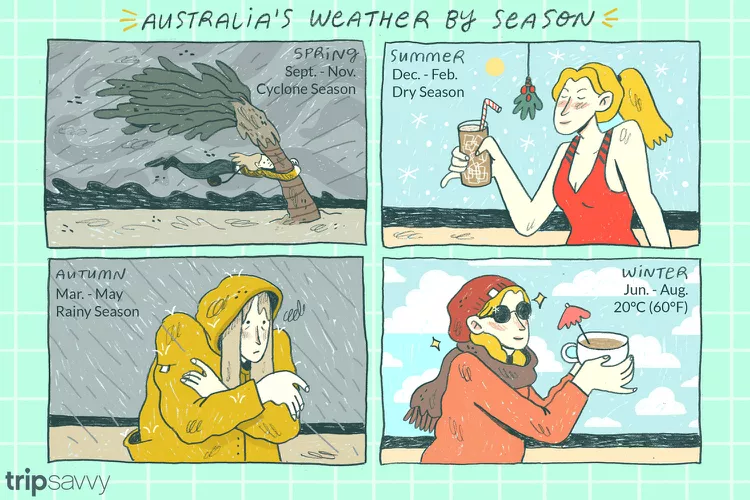

In [20]:
# In which season ordered the order?
# Summer  or Autumn  or  Winter  or  Spring

def get_seasons(order_date): # This function returns the name of the season from  the order date
    
    order_month =    order_month = order_date.month # To take the month number 
    
    if order_month in [12,1,2]:
        return "Summer"
    
    elif order_month in [3,4,5]:
        return "Autumn"
    
    elif order_month in [6,7,8]:
        return "Winter"
    
    else:
        return "Spring"
    

df["order_seasons"]  =  df["order_date"].apply(get_seasons) # apply the funchan 

#### month_name column 

In [21]:
# month_name in which month ordered the order 

df["month_name"]  =  df["order_date"].dt.month_name()  # Take the name of the month from order_date , and save it in month_name

#### Customer_Status column 

In [22]:
# Loyal =>  It means that the customer bought more than once  
# One-time => It means that the customer bought gust once time 

def get_Customer_Status(id): # This function returns if the customer is Loyal or One-time
    
    dict_order_value= df_orders["customer_id"].value_counts().to_dict() # i choosed table df_orders because the order_id values ​​are not duplicated
                                                                        # and save the values in a dictionary , the id = key ,
                                                                        # and the number of duplicated = value 
    if dict_order_value[id] > 1 : # if the values of id >=2 so this coutmar is Loyal
                                  # else he is One-time
        return "Loyal"
    
    else:
        return "One-time"


   
df["Customer_Status"] = df["customer_id"].apply(get_Customer_Status)

# Analysis Questions


# 1- Univariate Questions
#### 1- Which gender buys more from us .
#### 2- Which customer status buys more from us .
#### 3- what is the most seasons in the year best seller .
#### 4- The largest difference in days between the order date and the delivery date .
#### 5- Most state buy .
#### 6- Most city buy .
#### 7- Information about customers' ages .
#### 8- Best selling colours .
#### 9- Most product type of sales
#### 10- Information about each unit price

In [23]:
# Questions 1
# Which gender buys more from us .
gender= df["gender"].value_counts().to_frame().reset_index()
gender.columns = ["gender" , "number"]
Univariate_Questions_1 = px.bar(data_frame=gender , x="gender" , y="number" , title="gender buys from us" , color="gender" , color_discrete_sequence=px.colors.qualitative.G10 , text_auto=True)
Univariate_Questions_1.show()

In [24]:
# Questions 2
# Which customer status buys more from us .
Status = df["Customer_Status"].value_counts().reset_index()
Status.columns = ["Customer_Status" , "number"]
Univariate_Questions_2 = px.pie(data_frame=Status , values="number" , names="Customer_Status" ,title="customer status" , color_discrete_sequence=px.colors.qualitative.Antique)
Univariate_Questions_2.show()

In [25]:
# Questions 3
# what is the most seasons in the year best seller .
seasons = df["order_seasons"].value_counts().reset_index()
seasons.columns = ["order_seasons" , "number"]
Univariate_Questions_3 = px.bar(data_frame=seasons , x="order_seasons" , y="number" , title="seasons in the year best seller" , color="order_seasons" , color_discrete_sequence=px.colors.qualitative.G10 , text_auto=True)
Univariate_Questions_3.show()

In [26]:
# Questions 4
# The largest difference in days between the order date and the delivery date .
Univariate_Questions_4 = px.histogram(data_frame=df , x="delivery_duration" , title="difference in days between the order date and the delivery date" , text_auto=True, nbins=50)
Univariate_Questions_4.show()

In [27]:
# Questions 5
# 5- Most state buy .

state = df["state"].value_counts().reset_index()
state.columns = ["state" , "number"]
Univariate_Questions_5 = px.bar(data_frame=state , x="state" , y="number" , title="Most state buy" , color="state" , color_discrete_sequence=px.colors.qualitative.Light24_r , text_auto=True )
Univariate_Questions_5.show()

In [28]:
# Questions 6
# 6- Most city buy .

city = df["city"].value_counts().reset_index()
city.columns = ["city" , "number"]
Univariate_Questions_6 = px.scatter(data_frame=city , x="city" , y="number" , title="Most city buy" , color="city" , color_discrete_sequence=px.colors.qualitative.Light24_r)
Univariate_Questions_6.show()


In [29]:
# Questions 7
# Information about customers' ages .
Univariate_Questions_7 = ff.create_distplot([df.age.to_list()] , group_labels=["ages"] , show_hist=False ,  bin_size=.1, show_rug=False  )
Univariate_Questions_7.update_layout(title_text="age distributions")
Univariate_Questions_7.show()

In [30]:
# Questions 8
# Best selling colours
colour= df["colour"].value_counts().to_frame().reset_index()
colour.columns = ["colour" , "number"]
Univariate_Questions_8 = px.bar(data_frame=colour , x="colour" , y="number" , title="Best selling colours" , color="colour" ,color_discrete_sequence=df["colour"].value_counts().index.to_list() , text_auto=True)
Univariate_Questions_8.show()

In [31]:
# Questions 9
# Most product type of sales

product_type = df["product_type"].value_counts().reset_index()
product_type.columns = ["product_type" , "number"]
Univariate_Questions_9 = px.pie(data_frame=product_type ,
                                 values="number" , names="product_type" ,
                                 title="Most product type of sales" , 
                                 color_discrete_sequence=px.colors.qualitative.Dark2)
Univariate_Questions_9.show()

In [32]:
# Questions 10
# Information about each unit price

Univariate_Questions_10 = ff.create_distplot([df_products.quantity.to_list()] , group_labels=["price"] , show_hist=False ,  bin_size=.10, show_rug=False  )
Univariate_Questions_10.update_layout(title_text="unit price distributions")
Univariate_Questions_10.show()

# 2- Bivariate Analysis
#### 1- The most common types of products are sold by seasons
#### 2- The cities that buy the most in each state
#### 3- Are order increasing over time
#### 4- Sales quantity for each product type
#### 5- What is the average delivery duration for each state 
#### 6- Total sales of each product type
#### 7- The top ten customers who bought from me
#### 8- Best selling sizes for each product type
#### 9- Does the size of the product affect the price?


In [33]:
# Questions 1
# 1- The most common types of products are sold by seasons

Bivariate_Questions_1 = px.histogram(data_frame=df , x="order_seasons" ,y="quantity", color="product_type" ,  color_discrete_sequence=px.colors.qualitative.Bold , text_auto=True , title="The most common types of products are sold by seasons")
Bivariate_Questions_1.show()

In [34]:
# Questions 2
# 2- The cities that buy the most in each state

Bivariate_Questions_2_1 =  px.strip(data_frame=df , x="state" ,y="order_id" , color="city" ,color_discrete_sequence=px.colors.qualitative.Bold , title="The cities that buy the most in each state"  )
Bivariate_Questions_2_1.show()

In [35]:
Bivariate_Questions_2_2 = px.bar(data_frame=df , x="state" , color="city" ,color_discrete_sequence=px.colors.qualitative.Bold , title="The cities that buy the most in each state"  )
Bivariate_Questions_2_2.show()

In [36]:
# Questions 3
# 3- Are order increasing over 
Bivariate_Questions_3 = px.scatter(data_frame= df, x="order_date" ,color="month_name" , color_discrete_sequence=px.colors.qualitative.Bold , title=" Are order increasing over "  )
Bivariate_Questions_3.show()

In [37]:
# Questions 4
# 4- Sales quantity for each product type
Sales_quantity = df.groupby("product_type")["quantity"].sum().reset_index()
Bivariate_Questions_4 = px.bar(data_frame=Sales_quantity , x="product_type" , y="quantity" , text_auto=True , title=" Sales quantity for each product type" , color="product_type" ,color_discrete_sequence=px.colors.qualitative.Safe )
Bivariate_Questions_4.show()

In [38]:
# Questions 5
# 5- What is the average delivery duration for each state 
average_delivery_duration =df.groupby("state")["delivery_duration"].mean().reset_index()
average_delivery_duration["delivery_duration"] = average_delivery_duration["delivery_duration"].astype("int")
Bivariate_Questions_5 = px.bar(data_frame=average_delivery_duration , x="state" , y="delivery_duration" , text_auto=True , title="average delivery duration for each state " , color="state" ,color_discrete_sequence=px.colors.qualitative.T10 )
Bivariate_Questions_5.show()

In [39]:
# Questions 6
# 6- Total sales of each product type
sales_of_each_product_type = df.groupby("product_type")["total_price"].sum().reset_index()
Bivariate_Questions_6 = px.bar(data_frame=sales_of_each_product_type , x="product_type" , y="total_price" , text_auto=True , title="Total sales of each product type" , color="product_type" ,color_discrete_sequence=px.colors.qualitative.T10)
Bivariate_Questions_6.show()

In [40]:
# Questions 7
# 7- The top ten customers who bought from me
top_ten_customers=df.groupby(["customer_id" ,"customer_name"])["order_id"].count().to_frame().reset_index().sort_values(by="order_id" , ascending=False)
top_ten_customers.columns = ["customer_id","customer_name" , "number"]
top_ten_customers = top_ten_customers.iloc[:10]
Bivariate_Questions_7 = px.bar(data_frame=top_ten_customers,x="customer_name" , y="number" , text_auto=True , title="The top ten customers who bought from me" , color="customer_name" ,color_discrete_sequence=px.colors.qualitative.Light24)
Bivariate_Questions_7.show()

In [41]:
# Questions 8
# 8- Best selling sizes for each product type


Best_selling_sizes = df.groupby(["product_type","size"])["quantity"].sum().to_frame().reset_index()
Bivariate_Questions_8 = px.bar(data_frame=Best_selling_sizes , x="product_type" , y= "quantity" ,color="size"  , text_auto=True , title="Best selling sizes for each product type" , color_discrete_sequence=px.colors.qualitative.Dark2)
Bivariate_Questions_8.show()

In [42]:
# Questions 9
# 9- Does the size of the product affect the price?
#Bivariate_Questions_9

OrdinalEncoder_for_size= {'XS':1, 'S':2, 'M':3, 'L':4, 'XL':5}
dict_size = {"size" : df["size"].map(OrdinalEncoder_for_size) ,"price_per_unit" : df["price_per_unit"]}
dict_size = pd.DataFrame(dict_size)

Bivariate_Questions_9 = px.imshow(dict_size.corr().round(2), text_auto=True)
Bivariate_Questions_9.show()
# there is not any relachan 

# Save the data frame in a file for use it at Dash Boasd 

In [43]:
df.to_csv("New_version_data.csv")

# Dash Board usssing streamlit

In [44]:
%%writefile DashBoard.py  
# to write a new file .py for the dash borad


# Import necessary libraries for data handling and visualization
import pandas as pd 
import numpy as np 
import plotly.express as px 
import streamlit as st 
import plotly.figure_factory as ff


# Set up the page layout and title for the dashboard
st.set_page_config(page_title = 'Simple DashBoard')


# page titell
st.title("Dashboard data analysis project")

# read the data fram 
df = pd.read_csv('New_version_data.csv')
df_products = pd.read_csv("Shopping Cart Database/products.csv")


# this slider for chooeing the number of rowes
n_rowes = st.slider("chooes number of rowes " , min_value = 5 , max_value = len(df) , step=1)
st.write(df[:n_rowes]) # print the data fram with the number of row 

st.write("\n") # new line 


# this selectbox for chooeing the type of analysis
analysis_type = st.selectbox("chooes the type of analysis " ,["Univariate","Bivariate"]) 
# button return true if clekd on 
botom=st.button("Go...!") 

if botom : # if button some one clekd on 
    if analysis_type == "Univariate" : #  the type of analysis
        st.write("# Univariate Analysis Questions are 10 ")
        cal_1,cal_2 = st.columns(2)
        with cal_1 :
            st.write("#### 1- Which gender buys more")
            st.write("#### 2- Which customer status buys more")
            st.write("#### 3- what is the seasons best seller")
            st.write("#### 4- Duration difference between order date and delivery date")
            st.write("#### 5- Most state buy")

        with cal_2 :
            st.write("#### 6- Most city buy")
            st.write("#### 7- Information about customers' ages")
            st.write("#### 8- Best selling colours")
            st.write("#### 9- Most product type of sales")
            st.write("#### 10- Information about each unit price")

        st.write("\n")
        st.write("\n")
        st.write("### Questions 1")
        gender= df["gender"].value_counts().to_frame().reset_index()
        gender.columns = ["gender" , "number"]
        Univariate_Questions_1 = px.bar(data_frame=gender , x="gender" , y="number" , title="gender buys from us" , color="gender" , color_discrete_sequence=px.colors.qualitative.G10 , text_auto=True)
        st.plotly_chart(Univariate_Questions_1)
 

        st.write("\n")
        st.write("\n")
        st.write("### Questions 2")
        Status = df["Customer_Status"].value_counts().reset_index()
        Status.columns = ["Customer_Status" , "number"]
        Univariate_Questions_2 = px.pie(data_frame=Status , values="number" , names="Customer_Status" ,title="customer status" , color_discrete_sequence=px.colors.qualitative.Antique)
        st.plotly_chart(Univariate_Questions_2)
        


        st.write("\n")
        st.write("\n")
        st.write("### Questions 3")
        seasons = df["order_seasons"].value_counts().reset_index()
        seasons.columns = ["order_seasons" , "number"]
        Univariate_Questions_3 = px.bar(data_frame=seasons , x="order_seasons" , y="number" , title="seasons in the year best seller" , color="order_seasons" , color_discrete_sequence=px.colors.qualitative.G10 , text_auto=True)
        st.plotly_chart(Univariate_Questions_3)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 4")
        Univariate_Questions_4 = px.histogram(data_frame=df , x="delivery_duration" , title="difference in days between the order date and the delivery date" , text_auto=True, nbins=50)
        st.plotly_chart(Univariate_Questions_4)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 5")
        state = df["state"].value_counts().reset_index()
        state.columns = ["state" , "number"]
        Univariate_Questions_5 = px.bar(data_frame=state , x="state" , y="number" , title="Most state buy" , color="state" , color_discrete_sequence=px.colors.qualitative.Light24_r , text_auto=True )
        st.plotly_chart(Univariate_Questions_5)


        st.write("\n")
        st.write("\n")
        st.write("### Questions 6")
        city = df["city"].value_counts().reset_index()
        city.columns = ["city" , "number"]
        Univariate_Questions_6 = px.scatter(data_frame=city , x="city" , y="number" , title="Most city buy" , color="city" , color_discrete_sequence=px.colors.qualitative.Light24_r)
        st.plotly_chart(Univariate_Questions_6)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 7")
        Univariate_Questions_7 = ff.create_distplot([df.age.to_list()] , group_labels=["ages"] , show_hist=False ,  bin_size=.1, show_rug=False  )
        Univariate_Questions_7.update_layout(title_text="age distributions")
        st.plotly_chart(Univariate_Questions_7)


        st.write("\n")
        st.write("\n")
        st.write("### Questions 8")
        colour= df["colour"].value_counts().to_frame().reset_index()
        colour.columns = ["colour" , "number"]
        Univariate_Questions_8 = px.bar(data_frame=colour , x="colour" , y="number" , title="Best selling colours" , color="colour" ,color_discrete_sequence=df["colour"].value_counts().index.to_list() , text_auto=True)
        st.plotly_chart(Univariate_Questions_8)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 9")
        product_type = df["product_type"].value_counts().reset_index()
        product_type.columns = ["product_type" , "number"]
        Univariate_Questions_9 = px.pie(data_frame=product_type ,values="number" , names="product_type" ,title="Most product type of sales" , color_discrete_sequence=px.colors.qualitative.Dark2)
        st.plotly_chart(Univariate_Questions_9)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 10")
        Univariate_Questions_10 = ff.create_distplot([df_products.quantity.to_list()] , group_labels=["price"] , show_hist=False ,  bin_size=.10, show_rug=False  )
        Univariate_Questions_10.update_layout(title_text="unit price distributions")
        st.plotly_chart(Univariate_Questions_10)

        st.write("\n")
        st.write("\n")
        st.write("# Done, thanks for your attention")
    
    elif analysis_type == "Bivariate" :

        st.write("# Bivariate Analysis Questions are 9 ")
        cal_1,cal_2 = st.columns(2)
        
        with cal_1 :
            st.write("#### 1- common types of products sold by seasons")
            st.write("#### 2- cities that buy the most in each state")
            st.write("#### 3- dose order increasing over time")
            st.write("#### 4- Sales quantity for each product type")
            st.write("#### 5- What is the average delivery duration for each state ")

        with cal_2 :
            st.write("#### 6- Total sales of each product type")
            st.write("#### 7- top ten customers who bought from me")
            st.write("#### 8- Best selling sizes for each product type")
            st.write("#### 9- Does the size of the product affect the price?")



        st.write("\n")
        st.write("\n")
        st.write("### Questions 1")
        Bivariate_Questions_1 = px.histogram(data_frame=df , x="order_seasons" ,y="quantity", color="product_type" ,  color_discrete_sequence=px.colors.qualitative.Bold , text_auto=True , title="The most common types of products are sold by seasons")
        st.plotly_chart(Bivariate_Questions_1)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 2")
        Bivariate_Questions_2_1 =  px.strip(data_frame=df , x="state" ,y="order_id" , color="city" ,color_discrete_sequence=px.colors.qualitative.Bold , title="The cities that buy the most in each state"  )
        st.plotly_chart(Bivariate_Questions_2_1)
        Bivariate_Questions_2_2 = px.bar(data_frame=df , x="state" , color="city" ,color_discrete_sequence=px.colors.qualitative.Bold , title="The cities that buy the most in each state"  )
        st.plotly_chart(Bivariate_Questions_2_2)




        st.write("\n")
        st.write("\n")
        st.write("### Questions 3")
        Bivariate_Questions_3 = px.scatter(data_frame= df, x="order_date" ,color="month_name" , color_discrete_sequence=px.colors.qualitative.Bold , title=" Are order increasing over "  )
        st.plotly_chart(Bivariate_Questions_3)


        st.write("\n")
        st.write("\n")
        st.write("### Questions 4")
        Sales_quantity = df.groupby("product_type")["quantity"].sum().reset_index()
        Bivariate_Questions_4 = px.bar(data_frame=Sales_quantity , x="product_type" , y="quantity" , text_auto=True , title=" Sales quantity for each product type" , color="product_type" ,color_discrete_sequence=px.colors.qualitative.Safe )
        st.plotly_chart(Bivariate_Questions_4)


        st.write("\n")
        st.write("\n")
        st.write("### Questions 5")
        average_delivery_duration =df.groupby("state")["delivery_duration"].mean().reset_index()
        average_delivery_duration["delivery_duration"] = average_delivery_duration["delivery_duration"].astype("int")
        Bivariate_Questions_5 = px.bar(data_frame=average_delivery_duration , x="state" , y="delivery_duration" , text_auto=True , title="average delivery duration for each state " , color="state" ,color_discrete_sequence=px.colors.qualitative.T10 )
        st.plotly_chart(Bivariate_Questions_5)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 6")
        sales_of_each_product_type = df.groupby("product_type")["total_price"].sum().reset_index()
        Bivariate_Questions_6 = px.bar(data_frame=sales_of_each_product_type , x="product_type" , y="total_price" , text_auto=True , title="Total sales of each product type" , color="product_type" ,color_discrete_sequence=px.colors.qualitative.T10)
        st.plotly_chart(Bivariate_Questions_6)


        st.write("\n")
        st.write("\n")
        st.write("### Questions 7")
        top_ten_customers=df.groupby(["customer_id" ,"customer_name"])["order_id"].count().to_frame().reset_index().sort_values(by="order_id" , ascending=False)
        top_ten_customers.columns = ["customer_id","customer_name" , "number"]
        top_ten_customers = top_ten_customers.iloc[:10]
        Bivariate_Questions_7 = px.bar(data_frame=top_ten_customers,x="customer_name" , y="number" , text_auto=True , title="The top ten customers who bought from me" , color="customer_name" ,color_discrete_sequence=px.colors.qualitative.Light24)
        st.plotly_chart(Bivariate_Questions_7)



        st.write("\n")
        st.write("\n")
        st.write("### Questions 8")
        Best_selling_sizes = df.groupby(["product_type","size"])["quantity"].sum().to_frame().reset_index()
        Bivariate_Questions_8 = px.bar(data_frame=Best_selling_sizes , x="product_type" , y= "quantity" ,color="size"  , text_auto=True , title="Best selling sizes for each product type" , color_discrete_sequence=px.colors.qualitative.Dark2)
        st.plotly_chart(Bivariate_Questions_8)




        st.write("\n")
        st.write("\n")
        st.write("### Questions 9")
        OrdinalEncoder_for_size= {'XS':1, 'S':2, 'M':3, 'L':4, 'XL':5}
        dict_size = {"size" : df["size"].map(OrdinalEncoder_for_size) ,"price_per_unit" : df["price_per_unit"]}
        dict_size = pd.DataFrame(dict_size)

        Bivariate_Questions_9 = px.imshow(dict_size.corr().round(2), text_auto=True)
        st.plotly_chart(Bivariate_Questions_9)

        st.write("\n")
        st.write("\n")
        st.write("# Done, thanks for your attention")












        






Overwriting DashBoard.py


In [45]:
! streamlit run DashBoard.py
# to run the file 

^C


##  Data Preprocessing

In [50]:
#  Delete unimportant columns like order_id , total_price ,customer_id , product_name ,
#  customer_name , gender , age , Customer_Status , payment , delivery_date , size , colour 

# Because i want the model to  predict the delivery duration , and there is no relationship between these columns and this target
df.drop(columns=["order_id","total_price","customer_id",
                "product_name","size","colour","customer_name","gender","age","Customer_Status","payment","delivery_date"] 
                ,inplace= True)

### work with categorical data 

In [53]:
df.select_dtypes("object").columns

Index(['product_type', 'city', 'state', 'order_seasons', 'month_name'], dtype='object')

In [60]:
# colam 1 "product_type" 
df["product_type"].nunique()
# i have three product_type and this column is nominal so will use "one hot encoding "

df = pd.get_dummies(df , columns=["product_type"] )

In [72]:
# colam 2 "city" 
df["city"].nunique()
# i have 604 city and this column is nominal so will use "binary encoding"

from category_encoders import BinaryEncoder 
encod = BinaryEncoder()
cities_binary_encoding = encod.fit_transform(df["city"])


df = pd.concat([df , cities_binary_encoding] , axis= 1)


df.drop(columns="city" , inplace= True)

In [74]:
# colam 3 "state" 
df["state"].nunique()
# i have 8 state and this column is nominal so will use "binary encoding"


encod = BinaryEncoder()
states_binary_encoding = encod.fit_transform(df["state"])


df = pd.concat([df , states_binary_encoding] , axis= 1)


df.drop(columns="state" , inplace= True)


In [78]:
# column 4 "order_seasons"

df["order_seasons"].nunique()
# i have 4 seasons and this column is nominal so will use "binary encoding"


encod = BinaryEncoder()
seasons_binary_encoding = encod.fit_transform(df["order_seasons"])


df = pd.concat([df , seasons_binary_encoding] , axis= 1)


df.drop(columns="order_seasons" , inplace= True)


In [81]:
# column 5 "month_name"

df["month_name"].nunique()
# i have 10 month name and this column is nominal so will use "binary encoding"

encod = BinaryEncoder()
month_binary_encoding = encod.fit_transform(df["month_name"])


df = pd.concat([df , month_binary_encoding] , axis= 1)


df.drop(columns="month_name" , inplace= True)


###  Split Data into Input Features and Target Variable

In [86]:
x = df.drop("delivery_duration" , axis= 1)
y= df["delivery_duration"]

### split data to train and tist 

In [88]:
from sklearn.model_selection import train_test_split

x_train , x_tist , y_train , y_tist = train_test_split( x , y , test_size=0.2 , random_state = 1)

### Feature Scaling 

In [94]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

x_train[['price_per_unit', 'quantity', 'available_in_stock']] = scaler.fit_transform(  x_train[['price_per_unit', 'quantity', 'available_in_stock']] )
x_tist [['price_per_unit', 'quantity', 'available_in_stock']]= scaler.fit_transform(  x_tist [['price_per_unit', 'quantity', 'available_in_stock']])

# finally the end .